# Trading Signal Class Labeling

## Concept

The concept for our bot is to make useful predictions about when there will be sufficient volatility to make a profitable arbitrage trade.

In order to accomplish this, we will create a class label that will denote the following:
* **0** indicates that in a future period, the price did not sufficiently deviate from the current price to execute a trade
* **1** indicates that in a future period, the future price exceeded the current price by more than the offset factor
* **-1** indicates that in a future period, the future price was below the current price by more than the offset factor

## Variable Parameters
### Period
It is unclear yet what a good period in the future might be.  Several periods can be attempted.
### Offset Factor
The initial class label will be assigned based on the deviation of the future price from the current price.  Initially, a factor of the standard deviation of the price will be used to determine whether the deviation is sufficient to execute a trade.



In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
from utils.utils import make_label

In [2]:
# get the data
susd_df = pd.read_csv(
    Path('export_to_csv/sUSD_historical_price'),
    infer_datetime_format=True,
    parse_dates=True,
    index_col='Time (UTC)'
)

susd_df.head()

,Close Price
Time (UTC),
2021-01-07 00:00:00+00:00,0.9884
2021-01-07 01:00:00+00:00,0.9893
2021-01-07 02:00:00+00:00,0.9914
2021-01-07 03:00:00+00:00,0.9780
2021-01-07 04:00:00+00:00,1.0090


In [3]:
susd_df.describe()

,Close Price
count,12992.000000
mean,0.999460
std,0.018387
min,0.764400
25%,0.992800
50%,0.999300
75%,1.008000
max,1.141000


<AxesSubplot:>

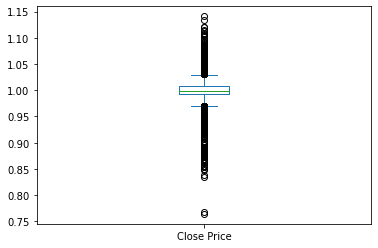

In [4]:
susd_df.plot(kind='box')

## Compare descrptive statistics with different windows

In [5]:
### First pass

In [6]:
window_sizes=[4,12,24,36,48,60,72,120,148]

In [7]:
for window_size in window_sizes:
    key = f"price_r{window_size}"
    susd_df[key] = susd_df['Close Price'].rolling(window_size).mean()
    
susd_df.head()

,Close Price,price_r4,price_r12,price_r24,price_r36,price_r48,price_r60,price_r72,price_r120,price_r148
Time (UTC),,,,,,,,,,
2021-01-07 00:00:00+00:00,0.9884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 01:00:00+00:00,0.9893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 02:00:00+00:00,0.9914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 03:00:00+00:00,0.9780,0.986775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 04:00:00+00:00,1.0090,0.991925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
susd_df.plot(kind='box', figure=(15,7))

NameError: name 'susd_df' is not defined

In [9]:
susd_df.describe()

,Close Price,price_r4,price_r12,price_r24,price_r36,price_r48,price_r60,price_r72,price_r120,price_r148
count,12992.000000,12989.000000,12981.000000,12969.000000,12957.000000,12945.000000,12933.000000,12921.000000,12873.000000,12845.000000
mean,0.999460,0.999463,0.999469,0.999480,0.999485,0.999490,0.999496,0.999502,0.999528,0.999550
std,0.018387,0.015919,0.014954,0.014389,0.013981,0.013635,0.013313,0.013010,0.012106,0.011775
min,0.764400,0.848600,0.855108,0.868833,0.874239,0.876552,0.880743,0.897200,0.937255,0.948539
25%,0.992800,0.994075,0.994375,0.994421,0.994542,0.994577,0.994602,0.994613,0.994873,0.994861
50%,0.999300,0.999450,0.999292,0.999325,0.999228,0.999140,0.999088,0.999071,0.998852,0.998702
75%,1.008000,1.007250,1.007250,1.007146,1.007144,1.007221,1.007400,1.007624,1.007446,1.007285
max,1.141000,1.078750,1.046008,1.035250,1.033019,1.031223,1.029260,1.028744,1.026852,1.025647


### Second Pass

In [10]:
susd_df = susd_df.loc[:,['Close Price']]
window_sizes=[1,2,4,6,8,12,16,24,36,48]
susd_df.head()

,Close Price
Time (UTC),
2021-01-07 00:00:00+00:00,0.9884
2021-01-07 01:00:00+00:00,0.9893
2021-01-07 02:00:00+00:00,0.9914
2021-01-07 03:00:00+00:00,0.9780
2021-01-07 04:00:00+00:00,1.0090


In [11]:
for window_size in window_sizes:
    key = f"price_r{window_size}"
    susd_df[key] = susd_df['Close Price'].rolling(window_size).mean()
    
susd_df.head()

,Close Price,price_r1,price_r2,price_r4,price_r6,price_r8,price_r12,price_r16,price_r24,price_r36,price_r48
Time (UTC),,,,,,,,,,,
2021-01-07 00:00:00+00:00,0.9884,0.9884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 01:00:00+00:00,0.9893,0.9893,0.98885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 02:00:00+00:00,0.9914,0.9914,0.99035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 03:00:00+00:00,0.9780,0.9780,0.98470,0.986775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 04:00:00+00:00,1.0090,1.0090,0.99350,0.991925,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

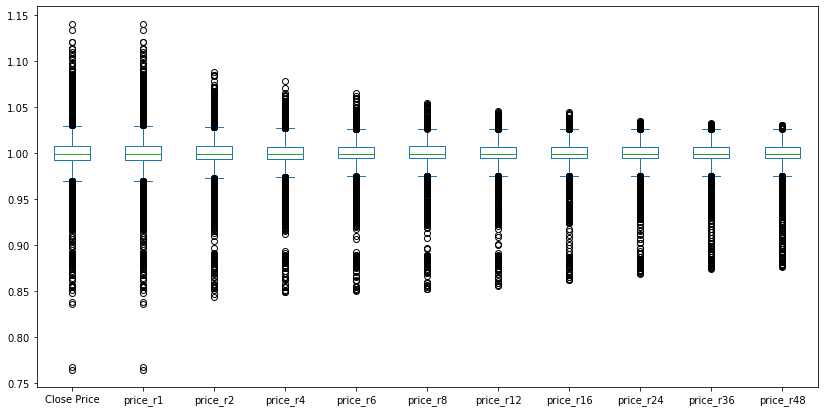

In [12]:
susd_df.plot(kind='box', figsize=(14,7))

<AxesSubplot:xlabel='Time (UTC)'>

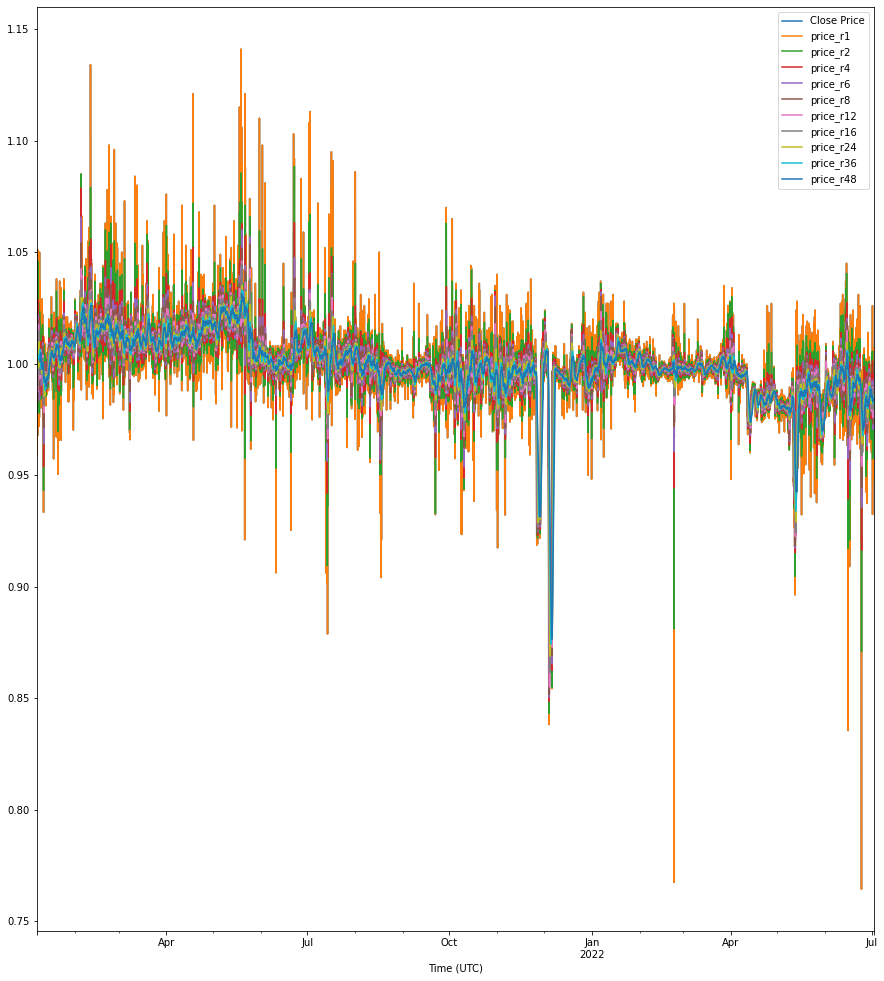

In [13]:
susd_df.plot(
figsize=(15,17))

In [14]:
susd_stats_df = susd_df.describe()
susd_stats_df

,Close Price,price_r1,price_r2,price_r4,price_r6,price_r8,price_r12,price_r16,price_r24,price_r36,price_r48
count,12992.000000,12992.000000,12991.000000,12989.000000,12987.000000,12985.000000,12981.000000,12977.000000,12969.000000,12957.000000,12945.000000
mean,0.999460,0.999460,0.999461,0.999463,0.999465,0.999466,0.999469,0.999473,0.999480,0.999485,0.999490
std,0.018387,0.018387,0.016848,0.015919,0.015513,0.015269,0.014954,0.014732,0.014389,0.013981,0.013635
min,0.764400,0.764400,0.843200,0.848600,0.850483,0.851662,0.855108,0.861581,0.868833,0.874239,0.876552
25%,0.992800,0.992800,0.993500,0.994075,0.994250,0.994325,0.994375,0.994519,0.994421,0.994542,0.994577
50%,0.999300,0.999300,0.999500,0.999450,0.999383,0.999362,0.999292,0.999287,0.999325,0.999228,0.999140
75%,1.008000,1.008000,1.007500,1.007250,1.007258,1.007300,1.007250,1.007206,1.007146,1.007144,1.007221
max,1.141000,1.141000,1.088500,1.078750,1.065667,1.054125,1.046008,1.044756,1.035250,1.033019,1.031223


In [15]:
(susd_stats_df['Close Price']['75%'] - susd_stats_df['Close Price']['mean']) / susd_stats_df['Close Price']['std']

0.4644414661665155

In [16]:
(susd_stats_df['Close Price']['25%'] - susd_stats_df['Close Price']['mean']) / susd_stats_df['Close Price']['std']

-0.3622190502194631

# Rolling standard Deviation


In [17]:
susd_df = susd_df.loc[:,['Close Price']]
window_sizes=[1,2,4,6,8,12,16,24,36,48]
susd_df.head()

,Close Price
Time (UTC),
2021-01-07 00:00:00+00:00,0.9884
2021-01-07 01:00:00+00:00,0.9893
2021-01-07 02:00:00+00:00,0.9914
2021-01-07 03:00:00+00:00,0.9780
2021-01-07 04:00:00+00:00,1.0090


In [18]:
for window_size in window_sizes:
    key = f"price_std_r{window_size}"
    susd_df[key] = susd_df['Close Price'].rolling(window_size).std()
    
susd_df.head()

,Close Price,price_std_r1,price_std_r2,price_std_r4,price_std_r6,price_std_r8,price_std_r12,price_std_r16,price_std_r24,price_std_r36,price_std_r48
Time (UTC),,,,,,,,,,,
2021-01-07 00:00:00+00:00,0.9884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 01:00:00+00:00,0.9893,NaN,0.000636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 02:00:00+00:00,0.9914,NaN,0.001485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 03:00:00+00:00,0.9780,NaN,0.009475,0.005984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 04:00:00+00:00,1.0090,NaN,0.021920,0.012814,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Time (UTC)'>

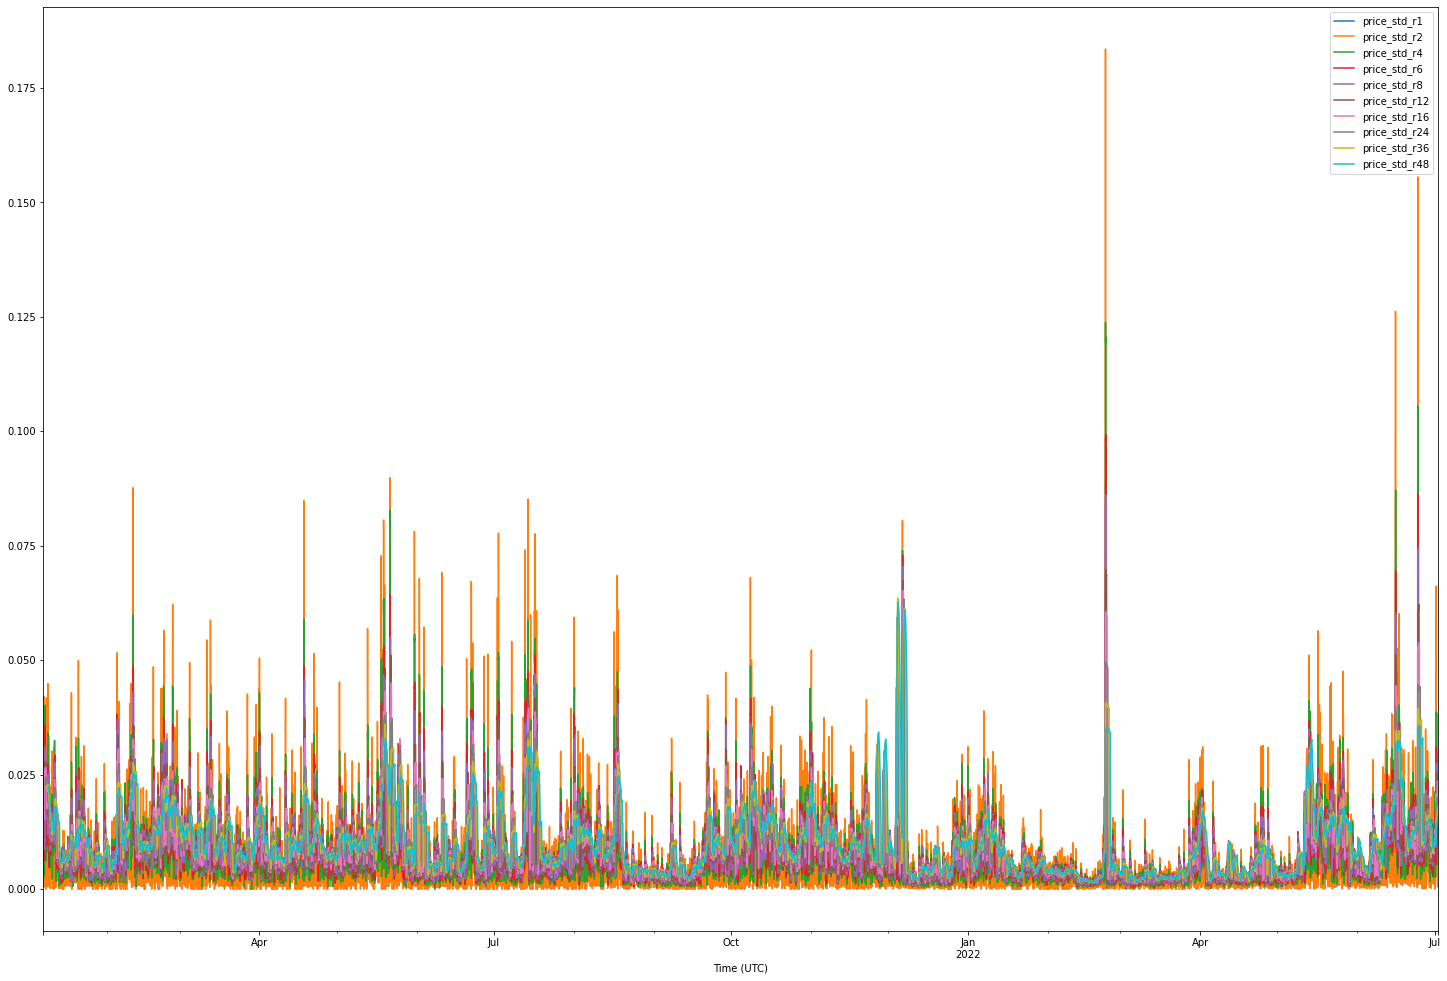

In [19]:
susd_df.drop(columns=['Close Price']).plot(
figsize=(25,17))

<AxesSubplot:>

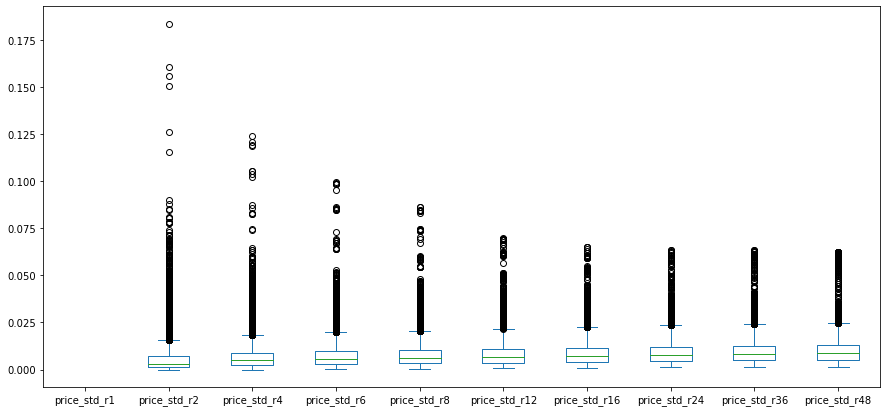

In [20]:
susd_df.drop(columns=['Close Price']).plot(kind='box',figsize=(15,7))

In [21]:
susd_df = susd_df.loc[:,['Close Price']]
susd_df.head()

,Close Price
Time (UTC),
2021-01-07 00:00:00+00:00,0.9884
2021-01-07 01:00:00+00:00,0.9893
2021-01-07 02:00:00+00:00,0.9914
2021-01-07 03:00:00+00:00,0.9780
2021-01-07 04:00:00+00:00,1.0090


In [22]:
# create a rolling window for "recent" volatility
std_window = 24*42 # focus on the volatility of the past 42 days, why 42, ask Kevin L.
susd_df['std']=susd_df['Close Price'].rolling(std_window).std()

In [23]:
factors = [0.5, 0.8, 1, 1.5, 2]
periods = [2,4,6,8]
prediction_summary = {
}
for period in periods:
    close_key = f"close_p{period}"
    susd_df[close_key] = susd_df['Close Price'].shift(period*-1)
    for factor in factors:
        y_key = f"y_p{period}_f{factor}"
        susd_df['offset'] = susd_df['std'] * factor
        susd_df[y_key] = susd_df.apply(
            make_label,
            axis=1,
            current_price_col='Close Price',
            future_price_col=close_key,
            offset_col = 'offset' )
        prediction_summary[y_key] = susd_df[y_key].value_counts()

In [24]:
pd.DataFrame(prediction_summary)

,y_p2_f0.5,y_p2_f0.8,y_p2_f1,y_p2_f1.5,y_p2_f2,y_p4_f0.5,y_p4_f0.8,y_p4_f1,y_p4_f1.5,y_p4_f2,y_p6_f0.5,y_p6_f0.8,y_p6_f1,y_p6_f1.5,y_p6_f2,y_p8_f0.5,y_p8_f0.8,y_p8_f1,y_p8_f1.5,y_p8_f2
-1,2393,1500,1119,602,373,2621,1627,1224,674,421,2588,1660,1284,715,453,2655,1747,1330,734,479
0,8240,10036,10785,11771,12238,7851,9739,10545,11635,12170,7792,9696,10459,11593,12108,7660,9560,10388,11544,12080
1,2359,1456,1088,619,381,2520,1626,1223,683,401,2612,1636,1249,684,431,2677,1685,1274,714,433


<AxesSubplot:>

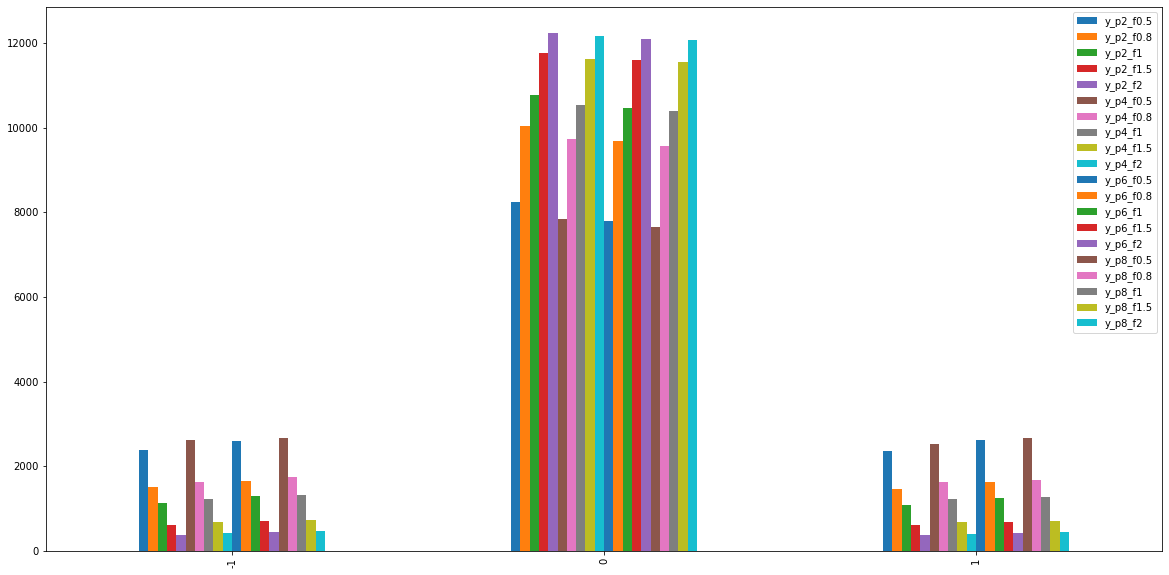

In [25]:
pd.DataFrame(prediction_summary).plot(kind='bar',figsize=(20,10))

### Take away
* period =4
* factor = 0.5
* classes are imbalanced